# Final Project

Student Name: Roshan Patel <br>


This dataset is a list of all the games played in the main european leagues from the year 2008 
until the year 2016. This dataset includes match date, score, teams, some players, and betting 
ods for the game. My project is to determine how time of the year impacts the end result of a game.
Using this info, I would like to be able to predict a winner and score of a game.

## Formulate the Project Research Framework

### Datasets introduction

This dataset is a list of all the games played in the main european leagues from the year 2008 
until the year 2016. This dataset includes match date, score, teams, some players, and betting 
ods for the game. My project is to determine how time of the year impacts the end result of a game.
Using this info, I would like to be able to predict a winner and score of a game.

### Research topic and research goal

My reasearch topic is about the statitics of a game of soccer. I will be exaining the trends and tendencies of games between 2008 and 2016, to find correlation and then predict outcomes. My goal is to be able to predict the outcome of a game given stats about the game conditions.

### Specific research questions

<ul>
    <li> Can I predict the outcome of a game when given game stats? </li>
    <li> Can I find correlation between how the betting compaines choose their odds for each game? </li>
    <li> Can I group the data into clusters to help sort the data?</li>

</ul>


### Import libraries

The first step is to import the libraries that will be used for the project. The main libraries are Pandas, MatplotLib, and sklearn. Pandas is used to read the dataset into python, so that we can do all of the other procedures on the dataset. MatplotLib is used to make graphs and other visual representations of the data. Sklearn is the library that is used to preform the machine learning algorithms. We must import many sublibraries of sklearn to use its various functionalities

In [45]:
#importing the libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as mp
import seaborn as sns
import numpy as np
import sklearn as sk

#importing sublibraries of sklearn
from sklearn import linear_model, preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 

%matplotlib inline

## Import the dataset

The next step is to import the dataset into python. The dataset I am using can be found at:

https://www.kaggle.com/datasets/hugomathien/soccer?resource=download&select=database.sqlite

In [46]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("database.sqlite")
#reading two of the parts of the data set
df_full = pd.read_sql_query("SELECT * from Match", con)

In [47]:
# Q1: Read the csv file and transfer the data into a DataFrame using Pandas (display the first 10 rows and 
#all columns to verify the data imported correctly)
df_full.head(10)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


### Data Science Analysis
The next step is to examine the data that we are using. This includes descriptive statistics, such as the datatype of all the rows, as well as numerical summaries such as the means, maxes and standard deviation of each line. This also inclueds using graphical summaries to help visulize the data, and then analyze it. Then we must find correlation between varibles and handle blank values, and fixing them.

In [48]:
#Display the data types from all columns
df_full.dtypes

id              int64
country_id      int64
league_id       int64
season         object
stage           int64
               ...   
GBD           float64
GBA           float64
BSH           float64
BSD           float64
BSA           float64
Length: 115, dtype: object

In [49]:
#Display a numerical summary of each column e.g. count, column mean value, column standard deviation, etc ...
df_full.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


#### Numerical summary analysis

The count displays how many rows are present for each column. All of the counts are equal to 25979. This is because 
there are exactly 25979 games in the database. The home_team_goal, and away_team_goal
columns are the only ones that matter for my project, in addition to the date. The player IDs and betting odds do not matter for my final project.
The mean of goals is 1.54 for home team, 
and 1.16 for away team. This means that on average the home team scored more goals than the away team. However, the standard
deviation shows that the away team was often father from the mean than the home team was to their mean. The min shows that
the lowest amount of goals ever scored by a home team is 0 goals, and the same applys to the away team. The max shows that 
the most goals scored by a home team is 10, and 9 goals for an away team. The 25%, 50%, and 75% show theinterquartile range 
of the dataset. in this dataset, thje 25% of the home goals is 1 for home and 0 for away. The 50% is 1 for both home and 
away, and the 75% is 2 for both home and away. 

In [50]:
#Identify missing data, deal with the missing data, and correct the data format

#How many missing values in each column from the dataset? Display the number of missing values in each column
print(df_full.isnull().sum())
print("total missing is: ",df_full.isnull().sum().sum())

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64
total missing is:  407395


### Handeling null values

For each column, how you deal with the missing data, explain the reasons. Update the missing values for each column

The missing data is found exclusively in the player ID and the betting odds sections. However, since this data is
irrelevant to my project, I decided to remove those values from the dataset. This leaves me with 0 missing data,
and a cleaner dataset with only the vallues that are needed.


In [51]:

cols=['id', 'season', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']
df=df_full[cols]

#checking to make sure there are no more missing values

print(df.isnull().sum())


id                  0
season              0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64


### Creating visual summaries

bar graph of number of total games played in each season. We see that they are all very similar, meaning that most seasons have similar amount of games played every year

Text(0, 0.5, 'number of games played (frequency)')

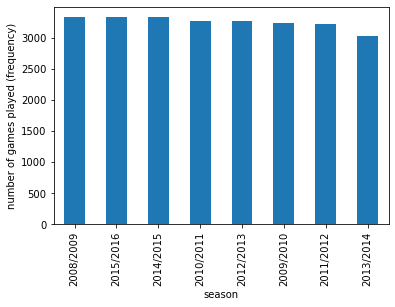

In [52]:

xy=df['season'].value_counts().plot(kind='bar')
xy.set_xlabel("season")
xy.set_ylabel("number of games played (frequency)")

In [53]:

#My quantative data is the total number of goals scored, compared to each season
df['total_goals'] = df['home_team_goal'] + df['away_team_goal']
df2 = df.groupby(['season']).sum()
df3=df.groupby(['season'])['total_goals'].value_counts()
df3

/var/folders/cl/30rcdfwx45qfv_b8js81t09h0000gn/T/ipykernel_63633/2233321586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_goals'] = df['home_team_goal'] + df['away_team_goal']


season     total_goals
2008/2009  2              836
           3              713
           1              634
           4              467
           0              256
                         ... 
2015/2016  6              156
           7               46
           8               11
           9                6
           12               1
Name: total_goals, Length: 89, dtype: int64

### Creating visual summaries

Creating a histogram and boxplot to compare total number of goals scored and season. The histogram shows how often a certain amount of goals per season appears. The box plot shows the toal amount of goals scored each season, and is sepreated by which season it took place in

<AxesSubplot:ylabel='Frequency'>

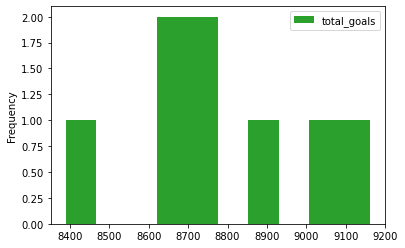

In [54]:
#For quantitative variable create a histogram and a boxplots grouped by categorical

#histogram
df2.plot( y="total_goals", kind="hist", color="C2")


Text(0, 0.5, 'total goals')

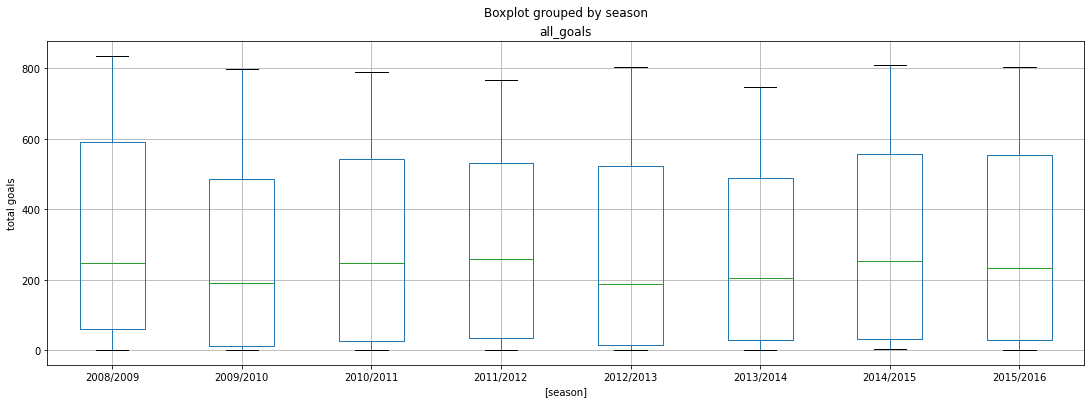

In [55]:
#boxplot

df4=df3.to_frame()
df4=df4.rename(columns={"total_goals":"all_goals"})
df4.reset_index()
bbplot=df4.boxplot(by='season',figsize=(18,6),return_type='axes')
bbplot[0].set_ylabel('total goals')

### Correlation and regression

First, we calculate the correlation between all of the betting odds for each company. The closser the number is to 1, the better the correlation is. The Aberivations follow the following key:
    
BS_ = Blue Square

GB_ = GameBrokers

VC_ = VC Bets

SJ_ = Stan James


_ _H = Home team wins odds

_ _D = Draw odds
 
_ _A = Away team wins odds

In [56]:
#correlation coeficient for all of the odds compared to each other
df_full[['SJH','SJD','SJA','VCH','VCD', 'VCA','GBH','GBD', 'GBA','BSH','BSD', 'BSA']].corr()

,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
SJH,1.000000,-0.019656,-0.486504,0.986818,-0.015998,-0.462940,0.987314,-0.025048,-0.522089,0.987664,-0.032365,-0.506825
SJD,-0.019656,1.000000,0.833574,-0.004513,0.962232,0.838904,-0.043753,0.972953,0.812292,-0.039581,0.970991,0.820617
SJA,-0.486504,0.833574,1.000000,-0.472875,0.816432,0.968328,-0.508958,0.827845,0.976786,-0.504323,0.829261,0.975342
VCH,0.986818,-0.004513,-0.472875,1.000000,0.038293,-0.419963,0.984229,-0.005970,-0.507240,0.984914,-0.013355,-0.492112
VCD,-0.015998,0.962232,0.816432,0.038293,1.000000,0.843782,-0.036787,0.967723,0.798012,-0.032143,0.968236,0.807773
VCA,-0.462940,0.838904,0.968328,-0.419963,0.843782,1.000000,-0.491449,0.838400,0.968117,-0.486699,0.842956,0.971111
GBH,0.987314,-0.043753,-0.508958,0.984229,-0.036787,-0.491449,1.000000,-0.041856,-0.539445,0.988317,-0.049098,-0.523106
GBD,-0.025048,0.972953,0.827845,-0.005970,0.967723,0.838400,-0.041856,1.000000,0.816672,-0.037814,0.980017,0.825114
GBA,-0.522089,0.812292,0.976786,-0.507240,0.798012,0.968117,-0.539445,0.816672,1.000000,-0.533729,0.818980,0.980309
BSH,0.987664,-0.039581,-0.504323,0.984914,-0.032143,-0.486699,0.988317,-0.037814,-0.533729,1.000000,-0.043640,-0.519117



<br>
This is a line of best fit drawn for the two companies. This means, when given the betting odds for one company, we can make a good guess on what the other company will bet
<br>


Text(0, 0.5, 'Gamebrokers Home Wins odds')

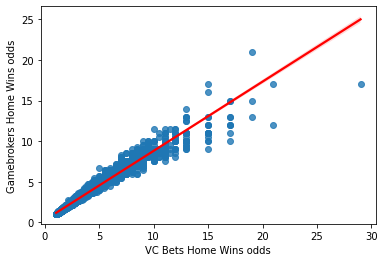

In [57]:
#scatter plot for VC Bets home wins odds, and Gamebrokers home team winners odds
l=sns.regplot(x=df_full["VCH"], y=df_full["GBH"], data=df_full,line_kws={"color": "red"})
l.set_xlabel("VC Bets Home Wins odds", fontsize = 10)
l.set_ylabel("Gamebrokers Home Wins odds", fontsize = 10)

Text(0, 0.5, 'Blue Square Draw odds')

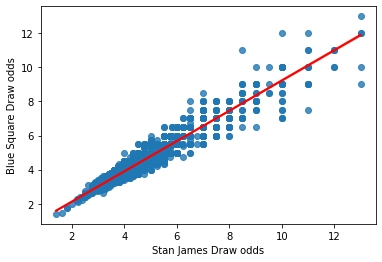

In [58]:
#scatter plot for Stan James draw odds, and Blue Square Draw odds

p=sns.regplot(x=df_full["SJD"], y=df_full["BSD"], data=df_full,line_kws={"color": "red"})
p.set_xlabel("Stan James Draw odds", fontsize = 10)
p.set_ylabel("Blue Square Draw odds", fontsize = 10)

#### Justifying the results


These results prove a clear correlation between all of the betting orginzations. Both the draw comparison and 
the home team wins comparison show a correlation coeficient greater than .97. This makes sense since many betting
companies use similar processes to determine the odds. The scatter plots prove this point.

### Missing data (null values) handling

For the rest of the data, I will not need all of the columns that is included in the full dataset. I made a new dataset that only contains the columns that I nead. This helps me remove most of the columns with many null values. For the rest of the columns, To handel null values, I replaced the number with the mean of the column. This means that all of the null rows in a certain column will be the same, which is the average of that column.

In [59]:
#remove all extra columns and fill NaN with it's columns means
df_small = df_full[df_full.columns.drop(list(df_full.filter(regex='player')))]
df_small = df_small.drop(['id','country_id','league_id','match_api_id','home_team_api_id','away_team_api_id','date','stage','season','goal', 'shoton', 'shotoff','foulcommit','card','cross','corner', 'possession'],axis=1)
df_small=df_small.fillna(df_small.mean())

In [60]:
#confirm that there is no remaining nulls
df_small.isnull().sum(axis=0)

home_team_goal    0
away_team_goal    0
B365H             0
B365D             0
B365A             0
BWH               0
BWD               0
BWA               0
IWH               0
IWD               0
IWA               0
LBH               0
LBD               0
LBA               0
PSH               0
PSD               0
PSA               0
WHH               0
WHD               0
WHA               0
SJH               0
SJD               0
SJA               0
VCH               0
VCD               0
VCA               0
GBH               0
GBD               0
GBA               0
BSH               0
BSD               0
BSA               0
dtype: int64

In [61]:
#creating a series that will be used for a regression algorithm
total_goals= df_small['home_team_goal']+df_small['away_team_goal']
df_small.head()

,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,0,0,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,0,3,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,5,0,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,1,3,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


### Regression algorithm

The following lines are the regression algorithms. This project has an example of both simple and multiple regression. 

#### Simple regression
The simple regression compares the number of home team goals to the number of total goals for each game. We first split the data into train and test. We then make a model using the train data, which is  80% of the total. We then test the model with the remain 20% of the data to see the accuracy. This model resulted in an R-2 score of .54

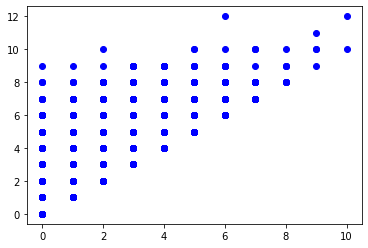

In [62]:
mp.scatter(df_small.home_team_goal, total_goals,  color='blue')

In [63]:
X_train, X_test, y_train, y_test = train_test_split( df_small['home_team_goal'], total_goals, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (20783,) (20783,)
Test set: (5196,) (5196,)


In [64]:
simple_regression= linear_model.LinearRegression()

train_x= np.asanyarray(X_train)
train_y = np.asanyarray(y_train)

train_x=train_x.reshape(-1,1)

simple_regression.fit(train_x, train_y)

print ('Coefficients: ', simple_regression.coef_)
print ('Intercept: ',simple_regression.intercept_)

Coefficients:  [0.94382072]
Intercept:  1.2510157567936864


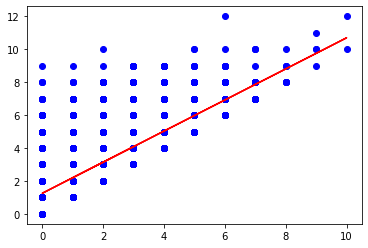

In [65]:
mp.scatter(df_small.home_team_goal, total_goals,  color='blue')
mp.plot(train_x, simple_regression.coef_[0]*train_x + simple_regression.intercept_, '-r')

In [66]:
test_x = np.asanyarray(X_test)
test_y = np.asanyarray(y_test)

test_x= test_x.reshape(-1,1)

test_y_predict = simple_regression.predict(test_x)



print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_predict - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_predict - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_predict) )

Mean absolute error: 0.89
Residual sum of squares (MSE): 1.30
R2-score: 0.54


#### Multiple regression
The multiple regression tests a different correlation. In this case, the regretion model will try to predict if a team will win, draw or lose. -1 means the home team lost, 0 means draw, and 1 means a home team victory. This model is much better than the simple regression model. This model showed to have an R-2 score of .74.  

In [67]:
#creating a series of either win, loss, draw
conditions=[
    (df_small['home_team_goal']>df_small['away_team_goal']),
    (df_small['home_team_goal']==df_small['away_team_goal']),
    (df_small['home_team_goal']<df_small['away_team_goal'])
]

values = [1,0,-1]
result=np.select(conditions, values)

In [68]:
#Spliting the model into an 80-20 split. This split will be used for the K Nearest Neighbors algorithm as well
X_train, X_test, y_train, y_test = train_test_split( df_small, result, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (20783, 32) (20783,)
Test set: (5196, 32) (5196,)


In [69]:

regr = linear_model.LinearRegression()
x = np.asanyarray(X_train)
y = np.asanyarray(y_train)

#fitting the model
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [ 3.86540468e-01 -4.41155423e-01 -3.15291938e-02  1.67934113e-02
 -2.61623267e-03  1.80096452e-02  4.41844324e-03  1.37570835e-02
 -1.64843604e-02  4.84531718e-02 -8.11683189e-03  1.25872637e-02
 -3.98763232e-02 -1.43553602e-03  2.63506255e-02 -1.60606166e-02
  1.24477878e-02 -2.17229113e-03  5.54139279e-03 -1.71374988e-03
 -1.20098056e-02  3.80041168e-03 -6.88336480e-04 -6.00929802e-03
 -2.27942912e-02 -1.14521853e-02  2.58122135e-04  3.29849154e-04
  1.00401875e-02  3.50135214e-02 -4.61720812e-02  9.56287216e-03]


In [70]:
#predicting the results using the test data
y_hat= regr.predict(X_test)
x = np.asanyarray(X_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))
print("R2-score: %.2f" % r2_score(y , y_hat) )

Residual sum of squares: 0.19
Variance score: 0.74
R2-score: 0.74


/Users/roshanpatel/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### K Nearest Neighbors

The following is a K Nearest Neighbors(KNN) algorithm. This algorithm is used to predict the result of a game, using the rest of the info given in the dataset. This model shows an prediction accuracy of .9559 on the test data. This model has a much higher accuracy than the simple and multiple regression models. The algorithm plots the test point, and find the K nearest datapoints in the data, and assume the new data follow the majority of this group. This algorithm shows that the effectiveness is the max at K=5.

In [71]:
#setting how many K to go up to in test
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

#testing accuracy for all K from 1-20
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.95419554, 0.94726713, 0.95342571, 0.95592764, 0.95592764,
       0.95496536, 0.95515781, 0.95188607, 0.9513087 , 0.94861432,
       0.94765204, 0.94765204, 0.94668976, 0.94572748, 0.94361047,
       0.94380293, 0.94110855, 0.94053118, 0.94168591])

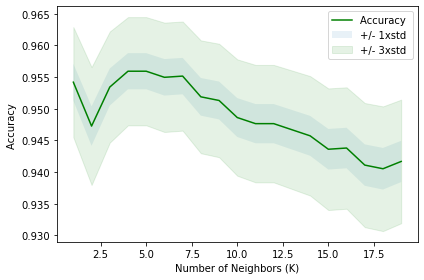

In [72]:
mp.plot(range(1,Ks),mean_acc,'g')
mp.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
mp.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
mp.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
mp.ylabel('Accuracy ')
mp.xlabel('Number of Neighbors (K)')
mp.tight_layout()
mp.show()

In [73]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [74]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([-1,  1,  0,  1,  1])

In [75]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("The model produced a Mean Squared Error of:",mean_squared_error(y_test, yhat))

Test set Accuracy:  0.9559276366435719
The model produced a Mean Squared Error of: 0.05677444187836798


## Final report summarized conclusion

### Abstract

This project tested to see if I can predict the outcome of a Soccer game when given the betting odds and other stats about the game. The first step was to get Numerical and graphical summaries of the data to understand it better. Then We needed to handel the missing values in the data so that they so not skew the data. Then we made our algorithms to predict the outcomes of the games using trained models.

### Background
This project uses data of every soccer game played in the main european countries from 2008 until 2016. This data stored 25979 games, each being a row. Each game recorded the score, season, date, and betting odds from many companies for many of the fows. Each company uses their own scale and factors to determine the odds, so each number is different.

### Methods
This project used many different methods to show the results. The first method we used were basic Pandas analysis tools, and MatplotLib graphing tools. Then we used seaborns regression plot to find a line of best fit. Then we used scikit-learn to make a regression line (both simple and multiple), and for a KNN and K Means Clustering algorithm.

### Results
The results of this project were extremely succsessful. With the parts of the project where fitting a model and making a prediction were involved, we had a lot of success. The Simple Regression Model did not produce a great result, with an accuracy of only .54. However, the Multiple regression was much better, with an accuracy of .74. Finnaly, we saw the most amount of success with the KNN model, which returned an accuracy of .96.

### Discussion and conclusions
In conclusion, this project can succesfully predict the outcome of a soccer game using basic data that is given. This project can be used in the future by people who are into sports betting to help them hopefully make the best bet. This project can also be used by the teams that are playing. If the alogrithm predicts that the team will likely lose, they might change their strategy to get an advantage. This project can be used for a variety of task depending on what the user wants

### References
This project uses the dataset from the follwing link:
https://www.kaggle.com/datasets/hugomathien/soccer?resource=download&select=database.sqlite

## Thank you for viewing this project